In [1]:
#x01_populationStatistics

In [2]:
from chewc.callback import *
from chewc.policy import *
from chewc.sim import *
from chewc.lab import *
from chewc.config import *
from chewc.utils import *


import matplotlib.pyplot as plt
import uuid
import pdb
import torch
import torch
import torch.nn.functional as F
import torch.nn as nn
import gymnasium as gym
import numpy as np
device='cpu'
from torch.utils.tensorboard import SummaryWriter



from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import CallbackList

In [4]:
config = get_default_config()
config['n_parents'] = 5
config['n_loci'] = 100
config['pop_size'] = 100
config['max_generations'] = 3
config['total_timesteps'] = 500000
config['seed'] = 4
config['sparse_reward'] = True
config['h2'] = 1

for i in config:
    print(f"{i} : {config[i]}")

observation_config : {'remaining_proportion': {'type': 'scalar', 'low': 0, 'high': 1}, 'genetic_variance': {'type': 'scalar', 'low': 0, 'high': inf}, 'mean_phenotype': {'type': 'scalar', 'low': -inf, 'high': inf}, 'max_breeding_value': {'type': 'scalar', 'low': -inf, 'high': inf}}
action_low : 0.01
action_high : 0.99
sparse_reward : True
n_parents : 5
n_chr : 1
n_loci : 100
pop_size : 100
max_generations : 3
h2 : 1
target_mean : 0
target_variance : 1
reps : 1
total_timesteps : 500000
learning_rate : 0.0003
gae_lambda : 0.95
log_freq : 100
start_gen : 10
end_gen : 100
start_gae_lambda : 0.9
end_gae_lambda : 0.95
seed : 4


Best action: 0.070
Best average max phenotype in final generation: 9.066


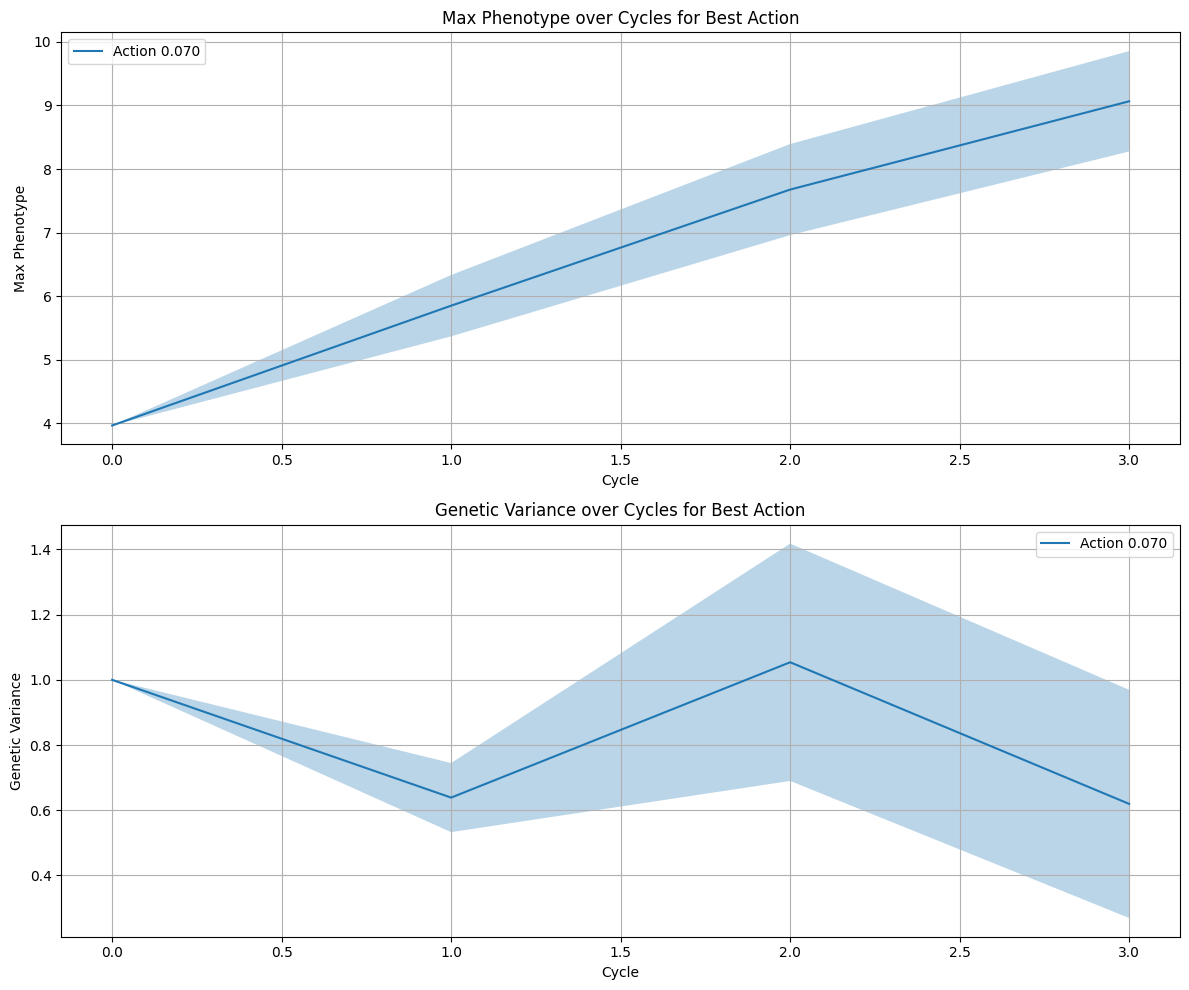

In [5]:

env = create_simulation(config)

    
# Usage remains the same
actions = np.linspace(.01, .35, 35)  # or however many actions you want to test
results, best_action, best_average = collect_baselines(env, actions, repetitions=100, cycles=env.SP.max_generations)

print(f"Best action: {best_action:.3f}")
print(f"Best average max phenotype in final generation: {best_average:.3f}")

# Plot the best run with both max phenotype and genetic variance
plot_best_run(results, best_action)

In [6]:
FE = MultiScalarFeatureExtractor(env.observation_space)
mock_observation = torch.tensor([[0.5,0.5,0.5,0.5,]], dtype=torch.float32)  # Single scalar input
FE(mock_observation)

tensor([[0.0000, 0.8494, 0.0000, 0.4479, 0.3903, 0.0000, 0.0612, 0.0193, 0.3400,
         0.0000, 0.0249, 0.0000, 0.3885, 0.2437, 0.0100, 0.0000, 0.6232, 0.0000,
         0.0000, 0.0000, 0.2927, 0.0000, 0.0000, 0.0000, 0.8837, 0.0000, 0.0000,
         0.4147, 0.7294, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1947, 0.1567,
         0.4527, 0.0000, 0.0000, 0.2808, 0.0000, 0.0000, 0.0000, 0.0773, 0.3457,
         0.3621, 0.3082, 0.1101, 0.0000, 0.0487, 0.0000, 0.2668, 0.0000, 0.6761,
         0.0000, 0.6282, 0.3863, 0.0000, 0.0000, 0.6214, 0.0000, 0.0000, 0.0000,
         0.3878]], grad_fn=<ReluBackward0>)

In [7]:
model = PPO(MultiScalarPolicy, env, verbose=1)
model.learn(total_timesteps=100)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 4        |
|    ep_rew_mean     | 7.99     |
| time/              |          |
|    fps             | 1077     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------


In [ ]:

model = PPO(
    MultiScalarPolicy,
    env,
    verbose=1,
    tensorboard_log='../dev_nbs/ppotb'
)


# model = PPO(CustomActorCriticPolicy, vec_env, verbose=1, tensorboard_log="./ppotb")
# model.learn(total_timesteps=config['total_timesteps'], callback=combined_callbacks)

# Create your custom callbacks
genetic_variance_callback = AverageFinalGenerationCallback(log_freq=1000)
action_callback = ActionTrackingCallback(log_freq=1000)

# Combine the callbacks using CallbackList
combined_callbacks = CallbackList([genetic_variance_callback, action_callback])
model.learn(total_timesteps=config['total_timesteps'], callback=combined_callbacks)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ../dev_nbs/ppotb/PPO_8


/home/glect/miniconda3/envs/breeding/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.max_generations to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.max_generations` for environment variables or `env.get_wrapper_attr('max_generations')` that will search the reminding wrappers.
  logger.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 4        |
|    ep_rew_mean     | 7.88     |
| time/              |          |
|    fps             | 835      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| final_generation/       |             |
|    genetic_variance     | 0.407       |
|    max_phenotype        | 8.1         |
| rollout/                |             |
|    ep_len_mean          | 4           |
|    ep_rew_mean          | 7.8         |
| time/                   |             |
|    fps                  | 727         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015179759 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.

In [ ]:
model.learn(total_timesteps=config['total_timesteps'], callback=combined_callbacks)

In [ ]:
plt.hist(env.population.breeding_values)

In [ ]:
env.SP.max_generations

In [ ]:

# Create your custom callbacks
genetic_variance_callback = AverageFinalGenerationCallback(log_freq=1000)
action_callback = ActionTrackingCallback(log_freq=1000)

# Combine the callbacks using CallbackList
combined_callbacks = CallbackList([genetic_variance_callback, action_callback])
vec_env = DummyVecEnv([lambda: env])
# Create and train the model with the custom policy
model = PPO(CustomActorCriticPolicy, vec_env, verbose=1, tensorboard_log="./ppotb")
model.learn(total_timesteps=config['total_timesteps'], callback=combined_callbacks)

In [ ]:
# config['sparse_reward'] =True
# env = create_simulation(config)
# env.reset()
# # Create your custom callbacks
# genetic_variance_callback = AverageFinalGenerationCallback(log_freq=1000)
# action_callback = ActionTrackingCallback(log_freq=1000)

# # Combine the callbacks using CallbackList
# combined_callbacks = CallbackList([genetic_variance_callback, action_callback])
# vec_env = DummyVecEnv([lambda: env])
# # Create and train the model with the custom policy
# model = PPO(CustomActorCriticPolicy, vec_env, verbose=1, tensorboard_log="./ppotb")
# model.learn(total_timesteps=config['total_timesteps'], callback=combined_callbacks)